In [1]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

In [2]:
from tabGAN import TabGAN
from src import constants as const
import helpers

imports_path = "src//imports.ipynb"

%run "$imports_path"

if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in global vars")

In [3]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

In [4]:
import sys
n_epochs = 300
n_critic = 10
opt_lr = 0.0002
adam_beta1 = 0.5
noise_discrete_unif_max = 0

batch_size = 500

n_synthetic_datasets = 10
n_synthetic_datasets_existing = 0

if sys.platform == "win32":
    jit_compile=True
elif sys.platform == "linux":
    jit_compile=False
else:
    raise RuntimeError("Did not recognize the system platform and therefore does not know how to initialize the storage directory path.")

retrain = True

In [ ]:
ctg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max, jit_compile=False,
                ctgan=True, ctgan_binomial_loss=True, ctgan_log_frequency=True,
                add_connection_discrete_to_num=True, dim_hidden_layer_discrete_to_num=50,
                )
ctg_qtr.train(300, batch_size=500, restart_training=False, progress_bar=True)

In [ ]:
ctg_qtr.sample()

In [ ]:
metrics, cats = helpers.eval.fit_and_evaluate_xgboost(data_train, data_test, retcats=True)
helpers.eval.fit_and_evaluate_xgboost(ctg_qtr.sample(), data_test, categories=cats)

In [99]:
ctabgan_args_dict = {
    "batch_size": 500,
    #"jit_compile": True,
    # WGAN parameters
    "n_critic": 10,
    "wgan_lambda": 10,
    # Optimizer parameters
    "optimizer": "adam",
    "opt_lr": 0.0002,
    "adam_beta1": 0.5,
    "adam_beta2": 0.999,
    # Transformation parameters
    "quantile_rand_transformation": True,
    "quantile_transformation_int": True,
    "qtr_spread": 0.8,
    "qtr_lbound_apply": 0.05,
    "max_quantile_share": 1,
    "n_quantiles_int": 1000,
    "qt_n_subsample": 1e5,
    "noise_discrete_unif_max": 0,
    # Neural network parameters
    "gumbel_temperature": 0.5,
    "activation_function": "GELU",
    "gelu_approximate": True,
    "dim_hidden": 256,
    "dim_latent": 128,
    # Conditional sampling parameters
    "ctgan": True,
    "ctgan_binomial_loss": True,
    "ctgan_log_frequency": True,
    # Packing parameters
    "pac": 1
}
ctg_qtr = TabGAN(data_train, **ctabgan_args_dict,
                train_step_critic_same_queries_for_critic_and_gen=True,
                 train_step_critic_wgan_penalty_query_diversity=False,
                train_step_critic_query_wgan_penalty=False,
                 query_input_to_critic=False, jit_compile=False)
ctg_qtr.train(0)

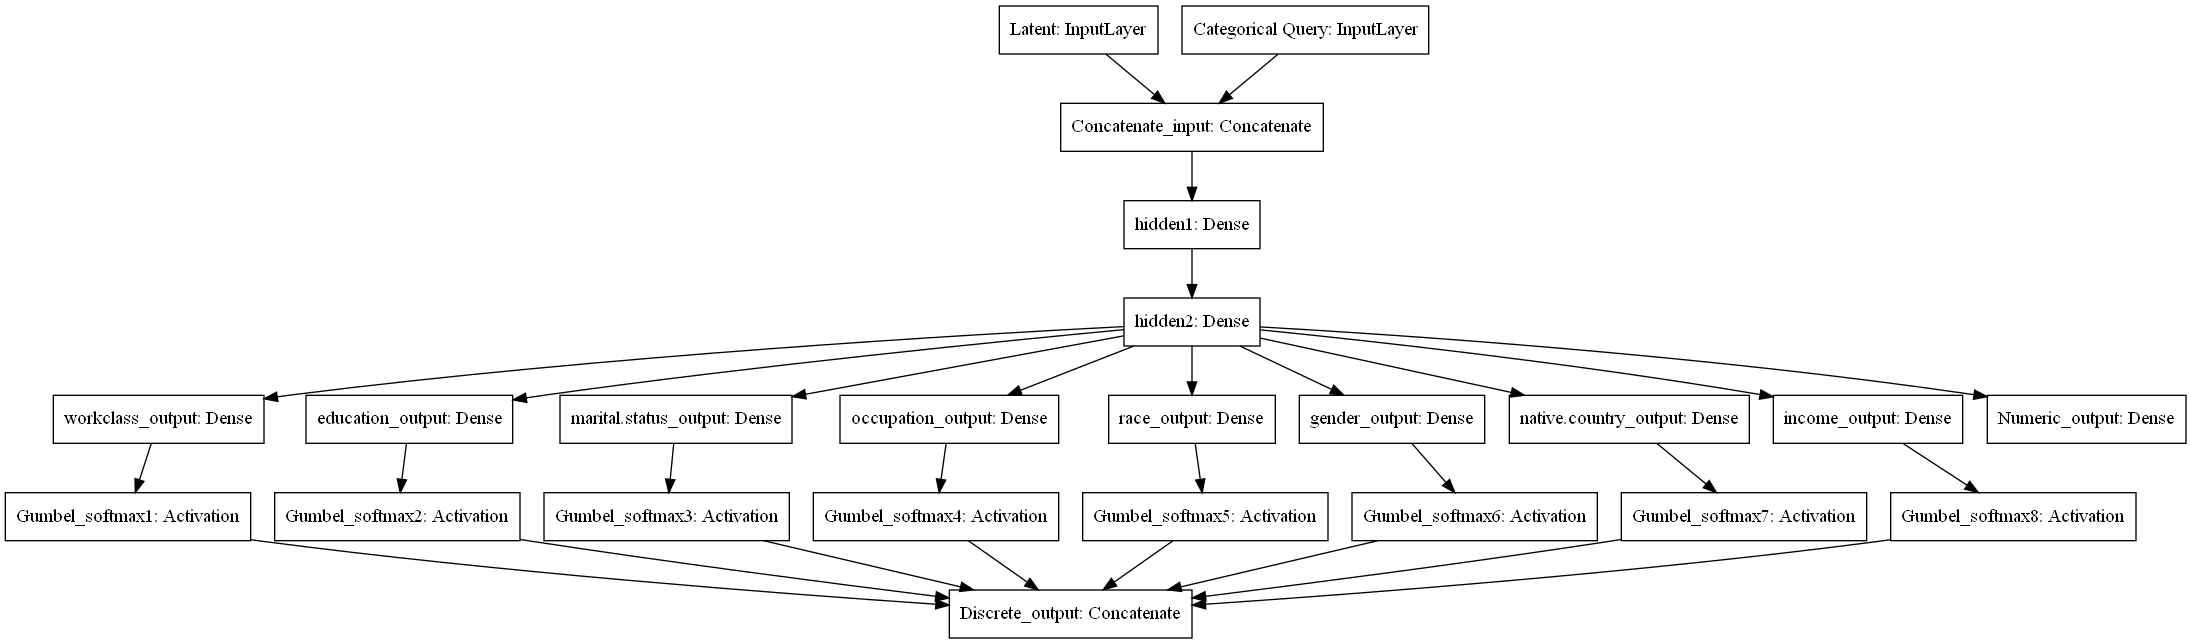

In [101]:
tf.keras.utils.plot_model(ctg_qtr.generator)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([0, 1, 3], dtype=int64)>

In [84]:
ctg_qtr.train(300, batch_size=500, restart_training=False, progress_bar=True)

  0%|          | 0/300 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [71]:
metrics, cats = helpers.eval.fit_and_evaluate_xgboost(data_train, data_test, retcats=True)
helpers.eval.fit_and_evaluate_xgboost(ctg_qtr.sample(), data_test, categories=cats)

{'accuracy': 0.8359893758300133,
 'auc': 0.8927436714883898,
 'f1': 0.7774885467454222,
 'f1_0': 0.8915810727767536,
 'f1_1': 0.663396020714091}

In [49]:
tabgan_args_dict = {
    "batch_size": 500,
    "jit_compile": jit_compile,
    # WGAN parameters
    "n_critic": 10,
    "wgan_lambda": 10,
    # Optimizer parameters
    "optimizer": "adam",
    "opt_lr": 0.0002,
    "adam_beta1": 0.5,
    "adam_beta2": 0.999,
    # Transformation parameters
    "quantile_rand_transformation": True,
    "quantile_transformation_int": True,
    "qtr_spread": 0.8,
    "qtr_lbound_apply": 0.05,
    "max_quantile_share": 1,
    "n_quantiles_int": 1000,
    "qt_n_subsample": 1e5,
    "noise_discrete_unif_max": 0.01,
    # Neural network parameters
    "gumbel_temperature": 0.1,
    "activation_function": "GELU",
    "gelu_approximate": True,
    "dim_hidden": 256,
    "dim_latent": 128,
    # Conditional sampling parameters
    "ctgan": False,
    "ctgan_binomial_loss": True,
    "ctgan_log_frequency": True,
    # Packing parameters
    "pac": 1
}
tg_qtr_hp = TabGAN(data_train, **tabgan_args_dict)

In [50]:
tg_qtr_hp.train(300, batch_size=500, restart_training=False, progress_bar=True)

  0%|          | 0/300 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [15]:
metrics, cats = helpers.eval.fit_and_evaluate_xgboost(data_train, data_test, retcats=True)
helpers.eval.fit_and_evaluate_xgboost(tg_qtr_hp.sample(), data_test, categories=cats)

{'accuracy': 0.8422310756972111,
 'auc': 0.8958616887133612,
 'f1': 0.7819163174408145,
 'f1_0': 0.8966057441253265,
 'f1_1': 0.6672268907563025}